# ARIMA

In [4]:
import pandas as pd
import openpyxl
# 1) it make pandas show ALL rows and columns
pd.set_option('display.max_rows',    None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width',       200)
pd.set_option('display.colheader_justify', 'center')

# 2) read
df = pd.read_excel('processed_energy_data.xlsx', engine='openpyxl')

In [5]:
# 3) summary
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nInfo:")
df.info()
print("\nDescribe:")
display(df.describe(include='all').T)

# 4) show  DataFrame


Shape: (74929, 16)

Columns:
 ['Day of supply', 'Hour', 'Trade zone', 'Price, UAH/MWh', 'Sales amount, MWh', 'Purchase amount, MWh', 'Nominated sales amount, MWh', 'Nominated purchase amount, MWh', 'Demand, MWh', 'Marginal price, UAH/MWh', 'Weekday', 'Day', 'Month', 'Year', 'Is_Weekend', 'Datetime']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74929 entries, 0 to 74928
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Day of supply                   74929 non-null  datetime64[ns]
 1   Hour                            74929 non-null  int64         
 2   Trade zone                      74929 non-null  object        
 3   Price, UAH/MWh                  74929 non-null  float64       
 4   Sales amount, MWh               74929 non-null  float64       
 5   Purchase amount, MWh            74929 non-null  float64       
 6   Nominated sales amount, MWh     74

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Day of supply,74929,NaN,NaN,NaN,2021-12-09 05:45:17.596657920,2019-07-01 00:00:00,2020-07-25 00:00:00,2021-08-19 00:00:00,2023-04-03 00:00:00,2025-05-23 00:00:00,NaN
Hour,74929.0,NaN,NaN,NaN,12.500274,1.0,7.0,13.0,19.0,25.0,6.922522
Trade zone,74929,3,IPS of Ukraine (synchronized with ENTSO-E syst...,28415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Price, UAH/MWh",74929.0,NaN,NaN,NaN,2433.027333,10.0,1265.0,1995.06,2955.03,9000.0,1738.849781
"Sales amount, MWh",74929.0,NaN,NaN,NaN,2307.328921,9.0,573.1,2262.8,3424.5,9200.9,1761.502827
"Purchase amount, MWh",74929.0,NaN,NaN,NaN,2307.328921,9.0,573.1,2262.8,3424.5,9200.9,1761.502827
"Nominated sales amount, MWh",74929.0,NaN,NaN,NaN,3653.384258,9.0,880.7,3524.8,5326.1,15548.1,2755.908375
"Nominated purchase amount, MWh",74929.0,NaN,NaN,NaN,2411.582291,118.4,652.7,2324.5,3521.7,13314.5,1826.125926
"Demand, MWh",74929.0,NaN,NaN,NaN,1241.801967,-8406.6,119.2,588.3,1881.7,15002.4,1786.572024
"Marginal price, UAH/MWh",74929.0,NaN,NaN,NaN,3051.370063,959.12,2000.0,2048.23,4000.0,9000.0,1965.604868


                            OLS Regression Results                            
Dep. Variable:         Price, UAH/MWh   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     4165.
Date:                Fri, 20 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:55:43   Log-Likelihood:            -4.9303e+05
No. Observations:               59943   AIC:                         9.861e+05
Df Residuals:                   59939   BIC:                         9.861e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1351.3771      8.379    161.288      

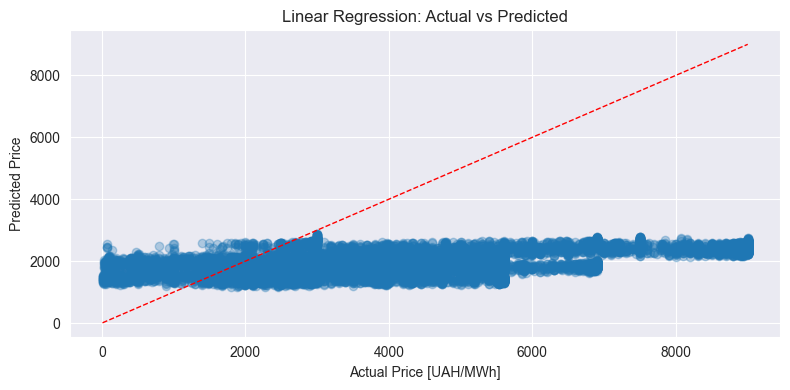

In [7]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# 2)
#    price ~ Demand + Hour + Is_Weekend
X = df[['Demand, MWh', 'Hour', 'Is_Weekend']].astype(float)
y = df['Price, UAH/MWh']

# 3)  drop any rows with missing values
data = pd.concat([X, y], axis=1).dropna()
X, y  = data[X.columns], data['Price, UAH/MWh']

# 4) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# 5a) Fit with statsmodels OLS to get the full summary
X_sm   = sm.add_constant(X_train)
model  = sm.OLS(y_train, X_sm).fit()
print(model.summary())

# 5b) Fit with sklearn
lr      = LinearRegression().fit(X_train, y_train)
y_pred  = lr.predict(X_test)

print(f"\nSKLearn LinearReg:\n"
      f"  Coefs: {dict(zip(X.columns, lr.coef_))}\n"
      f"  Intercept: {lr.intercept_:.2f}\n"
      f"  R²(train): {lr.score(X_train,y_train):.3f}\n"
      f"  R²(test):  {r2_score(y_test,y_pred):.3f}\n"
      f"  MSE(test): {mean_squared_error(y_test,y_pred):.2f}")

# 6) Plot actual vs predicted on test set
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=1)
plt.xlabel("Actual Price [UAH/MWh]")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.tight_layout()
plt.show()

In-sample fit is very weak • R²≈0.155 tells us these three variables explain just 15 % of the price varibility. • Adj R² is identical.
• const≈1571 UAH/MWh • Demand, MWh≈–0.084 (p<0.001) means that, all else equal, each extra megawatt of demand actually lowers price by ~0.08 UAH.Moving from one Hour number to the next on average raises price by ~67 UAH. • Is_Weekend≈–136.5 (p<0.001) means weekends trade ~136 UAH below weekdays.
Durbin–Watson ≈0.35 (vs. ideal ≈2) signals very strong positive autocorrelation in the residuals—OLS.
• In-sample R²(train)=0.155 vs. R²(test)=–0.953 means model is worse than predicting the test mean. • Test RMSE≈√12 235 976 ≈3 500 UAH.
Why the negative test R²? Because train/test split was chronological: the model learned patterns in the first 80 % of hours but those patterns didn’t hold in the last 20 %.

In [8]:
# Simple regression
# 2)  X & y
#    treat Is_Weekend (bool) as 0/1
X = df[['Demand, MWh', 'Hour', 'Is_Weekend']].astype(float)
y = df['Price, UAH/MWh']

# 3) Drop  missing values
data = pd.concat([X, y], axis=1).dropna()
X, y = data[X.columns], data['Price, UAH/MWh']

# 4) Add a constant and fit OLS on the  dataset
X_const = sm.add_constant(X)
model   = sm.OLS(y, X_const).fit()

# 5) Print the regression table
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Price, UAH/MWh   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     4028.
Date:                Fri, 20 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:55:50   Log-Likelihood:            -6.5976e+05
No. Observations:               74929   AIC:                         1.320e+06
Df Residuals:                   74925   BIC:                         1.320e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1781.8697     13.424    132.738      

Model fit is weak • R² ≈ 0.139 means it explains only ~14 % of the hour-to-hour price variation with demand, hour‐of‐day and weekend alone. • F-statistic p-value = 0.00 is very low.

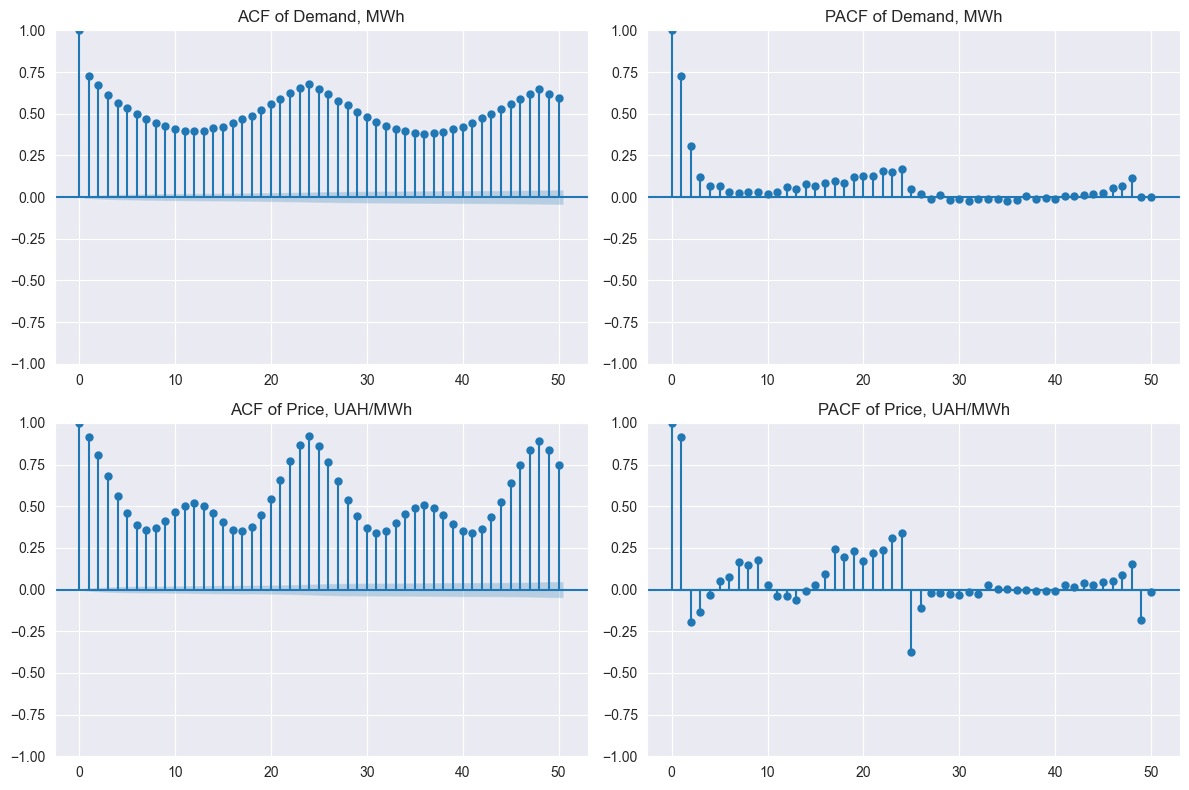

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# make sure df has a DateTimeIndex (hourly)
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime').sort_index()

# 2) drop  duplicates
df = df[~df.index.duplicated(keep='first')]

# 3)  drop  NaNs
series = {
    'Demand, MWh':      df['Demand, MWh'].dropna(),
    'Price, UAH/MWh':   df['Price, UAH/MWh'].dropna()
}

# 4) plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
lags = 50

for i, (name, s) in enumerate(series.items()):
    plot_acf(s,  lags=lags, ax=axes[i,0], title=f"ACF of {name}")
    plot_pacf(s, lags=lags, ax=axes[i,1], title=f"PACF of {name}", method='ywm')

plt.tight_layout()
plt.show()


Demand, MWh
ACF: small bump at lag 1 then rapid decay
PACF: a significant spike at lag 1, then essentially zero - sign of an AR(1) on a stationary series Candidate: ARIMA(1,0,0)
Price, UAH/MWh
ACF: very slow decay (non-stationary) with a seasonal lag around lag 24
PACF: large spike at lag 1, then a secondary spike at lag 24, then → Difference once to remove the trend, include an AR(1) plus a seasonal AR(1) at 24 Candidate: SARIMA(1,1,0)×(1,0,0,24)

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Demand AR(1)
mod_d = SARIMAX(df['Demand, MWh'], order=(1,0,0)).fit(disp=False)

# Price SARIMA(1,1,0)x(1,0,0,24)
mod_p = SARIMAX(df['Price, UAH/MWh'],
                order=(1,1,0),
                seasonal_order=(1,0,0,24),
                enforce_stationarity=False,
                enforce_invertibility=False
               ).fit(disp=False)
print(mod_d.summary(), mod_p.summary())

/Users/senshesen/Documents/GitHub/Machine-Learning-Group-3-Project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senshesen/Documents/GitHub/Machine-Learning-Group-3-Project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senshesen/Documents/GitHub/Machine-Learning-Group-3-Project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senshesen/Documents/GitHub/Machine-Learning-Group-3-Proje

                               SARIMAX Results                                
Dep. Variable:            Demand, MWh   No. Observations:                51666
Model:               SARIMAX(1, 0, 0)   Log Likelihood             -442332.309
Date:                Fri, 20 Jun 2025   AIC                         884668.619
Time:                        18:56:10   BIC                         884686.324
Sample:                             0   HQIC                        884674.156
                              - 51666                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8130      0.002    498.593      0.000       0.810       0.816
sigma2      1.599e+06   4768.241    335.342      0.000    1.59e+06    1.61e+06
Ljung-Box (L1) (Q):                5220.25   Jarque-

In [11]:
from statsmodels.tsa.stattools import adfuller, kpss

# 1) stationarity

demand = df['Demand, MWh'].dropna()
price  = df['Price, UAH/MWh'].dropna()

def stationarity_tests(x, name):
    print(f"\n=== {name} ===")
    # ADF:
    adf_stat, adf_p, _, _, _, _ = adfuller(x, autolag='AIC')
    print(f"ADF   → stat={adf_stat:.3f},  p-value={adf_p:.3f}")
    # KPSS:
    kpss_stat, kpss_p, _, _ = kpss(x, regression='c', nlags='auto')
    print(f"KPSS  → stat={kpss_stat:.3f},  p-value={kpss_p:.3f}")

# 2) Run on Demand and Price
stationarity_tests(demand, "Demand, MWh")
stationarity_tests(price,  "Price, UAH/MWh")


=== Demand, MWh ===
ADF   → stat=-7.107,  p-value=0.000
KPSS  → stat=2.272,  p-value=0.010

=== Price, UAH/MWh ===


/var/folders/fp/n4p1y05j3116rz4lkb70x3gm0000gn/T/ipykernel_99000/2763178956.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_p, _, _ = kpss(x, regression='c', nlags='auto')


ADF   → stat=-5.516,  p-value=0.000
KPSS  → stat=35.353,  p-value=0.010


/var/folders/fp/n4p1y05j3116rz4lkb70x3gm0000gn/T/ipykernel_99000/2763178956.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_p, _, _ = kpss(x, regression='c', nlags='auto')


The KPSS stat isn’t extremely large, so we can treat Demand as weakly stationary. Price is non-stationary

In [13]:
import pandas as pd
import numpy as np

from statsmodels.tsa.stattools  import arma_order_select_ic
from statsmodels.tsa.arima.model import ARIMA


# 2) Auto-select (p,q) for Demand (d=0)
sel_d = arma_order_select_ic(
    demand,
    max_ar=5, max_ma=5,
    ic=['aic','bic'],
    trend='c'    # include constant
)

/Users/senshesen/Documents/GitHub/Machine-Learning-Group-3-Project/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/senshesen/Documents/GitHub/Machine-Learning-Group-3-Project/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/senshesen/Documents/GitHub/Machine-Learning-Group-3-Project/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/senshesen/Documents/GitHub/Machine-Learning-Group-3-Project/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarn

In [35]:
p_d, q_d = sel_d.aic_min_order
best_aic_d = sel_d.aic.loc[p_d, q_d]
print(f"Demand → best by AIC: (p,d,q)=({p_d},0,{q_d}),  AIC={best_aic_d:.0f}")

Demand → best by AIC: (p,d,q)=(3,0,3),  AIC=870212


In [15]:
# 3) Auto-select (p,q) for Price (d=1)
#    first difference to stationarize
price_diff = price.diff().dropna()

sel_p = arma_order_select_ic(
    price_diff,
    max_ar=5, max_ma=5,
    ic=['aic','bic'],
    trend='c'
)

/Users/senshesen/Documents/GitHub/Machine-Learning-Group-3-Project/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/senshesen/Documents/GitHub/Machine-Learning-Group-3-Project/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/senshesen/Documents/GitHub/Machine-Learning-Group-3-Project/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/senshesen/Documents/GitHub/Machine-Learning-Group-3-Project/.venv/lib/python3.12/site-packages/statsmodels/tsa/stat

In [17]:
# using positional indexing
best_aic_p = sel_p.aic.iloc[p_p, q_p]
print(f"Price  → best by AIC: (p,d,q)=({p_p},1,{q_p}),  AIC={best_aic_p:.0f}")

Price  → best by AIC: (p,d,q)=(3,1,4),  AIC=818368


In [19]:
# 4) Fit the chosen ARIMA for each
demand = demand.asfreq('H')   # fill in any missing hours with NaN if needed
price  = price .asfreq('H')

# now the index.freq is 'H' and matches freq='H' in ARIMA
mod_d = ARIMA(demand, order=(p_d,0,q_d), freq='H').fit()
mod_p = ARIMA(price,  order=(p_p,1,q_p), freq='H').fit()

/var/folders/fp/n4p1y05j3116rz4lkb70x3gm0000gn/T/ipykernel_99000/3116943081.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  demand = demand.asfreq('H')   # fill in any missing hours with NaN if needed
/var/folders/fp/n4p1y05j3116rz4lkb70x3gm0000gn/T/ipykernel_99000/3116943081.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  price  = price .asfreq('H')
/Users/senshesen/Documents/GitHub/Machine-Learning-Group-3-Project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:595: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = to_offset(freq)
/Users/senshesen/Documents/GitHub/Machine-Learning-Group-3-Project/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimiza

In [20]:

print("\nDemand ARIMA summary:")
print(mod_d.summary().tables[1])

print("\nPrice ARIMA summary:")
print(mod_p.summary().tables[1])



Demand ARIMA summary:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1227.5801   3.97e-10   3.09e+12      0.000    1227.580    1227.580
ar.L1          2.9243      0.001   4894.885      0.000       2.923       2.925
ar.L2         -2.9163      0.001  -2475.653      0.000      -2.919      -2.914
ar.L3          0.9920      0.001   1669.042      0.000       0.991       0.993
ma.L1         -2.7673      0.002  -1513.922      0.000      -2.771      -2.764
ma.L2          2.6079      0.004    727.394      0.000       2.601       2.615
ma.L3         -0.8347      0.002   -453.947      0.000      -0.838      -0.831
sigma2      1.347e+06   8.75e-10   1.54e+15      0.000    1.35e+06    1.35e+06

Price ARIMA summary:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1  

# Lasso


After loading data we need to Select Target Variable (y) and Input Features (X). We used all columns except for the target column Price, UAH/MWh and any identifier columns (like Datetime, Day of supply, etc.).

In [21]:
data = pd.read_excel('processed_energy_data.xlsx')

data.head()

,Day of supply,Hour,Trade zone,"Price, UAH/MWh","Sales amount, MWh","Purchase amount, MWh","Nominated sales amount, MWh","Nominated purchase amount, MWh","Demand, MWh","Marginal price, UAH/MWh",Weekday,Day,Month,Year,Is_Weekend,Datetime
0,2019-07-01,1,Burshtyn peninsula,939.0,313.3,313.3,313.3,364.0,-50.7,959.12,Monday,1,7,2019,False,2019-07-01 00:00:00
1,2019-07-01,2,Burshtyn peninsula,939.0,240.9,240.9,240.9,334.2,-93.3,959.12,Monday,1,7,2019,False,2019-07-01 01:00:00
2,2019-07-01,3,Burshtyn peninsula,939.0,259.1,259.1,259.1,319.9,-60.8,959.12,Monday,1,7,2019,False,2019-07-01 02:00:00
3,2019-07-01,4,Burshtyn peninsula,939.0,152.6,152.6,152.6,320.5,-167.9,959.12,Monday,1,7,2019,False,2019-07-01 03:00:00
4,2019-07-01,5,Burshtyn peninsula,939.0,152.8,152.8,152.8,317.3,-164.5,959.12,Monday,1,7,2019,False,2019-07-01 04:00:00


After loading data we need to Select Target Variable (y) and Input Features (X). We used all columns except for the target column Price, UAH/MWh and any identifier columns (like Datetime, Day of supply, etc.).

In [22]:
# Droping identifier and target columns
data_clean = data.drop(columns=['Datetime', 'Day of supply', 'Weekday', 'Day', 'Month', 'Year'])

# Target variable (y)
y = data_clean['Price, UAH/MWh']

# Input features (X) - all other columns except the target
X = data_clean.drop(columns=['Price, UAH/MWh'])

# Displaying the first few rows of X and y
X.head(), y.head()


(   Hour      Trade zone      Sales amount, MWh  Purchase amount, MWh  Nominated sales amount, MWh  Nominated purchase amount, MWh  Demand, MWh  Marginal price, UAH/MWh  Is_Weekend
 0    1   Burshtyn peninsula        313.3                313.3                    313.3                          364.0                 -50.7             959.12              False  
 1    2   Burshtyn peninsula        240.9                240.9                    240.9                          334.2                 -93.3             959.12              False  
 2    3   Burshtyn peninsula        259.1                259.1                    259.1                          319.9                 -60.8             959.12              False  
 3    4   Burshtyn peninsula        152.6                152.6                    152.6                          320.5                -167.9             959.12              False  
 4    5   Burshtyn peninsula        152.8                152.8                    152.8        

Let's proceed with next step and perform data preprocessing, which involves handling missing values, encoding categorical variables, and scaling numerical features.

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identifying numerical and categorical columns
numerical_columns = X.select_dtypes(exclude=['object']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data: handling missing values and scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: encoding and handling missing values
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One hot encoding (ignore unknown categories)
])

# Combining both transformers into a single column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

Next step includes spliting the data into training and testing sets for evaluating the model later. We'll use 80% of the data for training and 20% for testing.

In [24]:
from sklearn.model_selection import train_test_split

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shape of the training and testing sets
X_train.shape, X_test.shape


((59943, 9), (14986, 9))

After this step we now have the following shapes for training and testing sets:
Training data (X_train): (59943, 9) – 59,943 samples and 9 features.
Testing data (X_test): (14986, 9) – 14,986 samples and 9 features.

In [25]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('regressor', Lasso(alpha=0.1))  # Lasso regression with alpha set to 0.1
])

# Training the Lasso regression model on the training data
model.fit(X_train, y_train)

# Output the model training status
print("Model training completed.")

Model training completed.


/Users/senshesen/Documents/GitHub/Machine-Learning-Group-3-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.276e+08, tolerance: 1.828e+07
  model = cd_fast.enet_coordinate_descent(


Evaluating the Model by calculating the Mean Squared Error (MSE) and R-squared. These metrics show us how well the model is performing.

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_squared_error
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Squared Error: 676486.7511452136
R-squared: 0.7680941237409034
Root Mean Squared Error (RMSE): 822.4881465074214


The model has a Mean Squared Error (MSE) of 676,487, which suggests that the model's forecasts are off by an average of approximately 676 UAH/MWh. Despite this considerable error, the R-squared (R²) value of 0.768 indicates that the model explains around 76.8% of the variability in Price, UAH/MWh.

In [27]:

feature_names = numerical_columns.tolist() + list(preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_columns))

# coefficients from the trained Lasso model
lasso_coefficients = model.named_steps['regressor'].coef_

coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefficients
})


coeff_df['Absolute Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Absolute Coefficient', ascending=False)

# Displaying the top 10 features with the largest coefficients (importance)
print("\nTop 10 Features by Lasso Coefficients:")
print(coeff_df.head(10)[['Feature', 'Coefficient']])


Top 10 Features by Lasso Coefficients:
              Feature               Coefficient
6         Marginal price, UAH/MWh  1.365161e+03
9       Trade zone_IPS of Ukraine -3.050594e+02
5                     Demand, MWh -2.224630e+02
1               Sales amount, MWh  1.935521e+02
0                            Hour  1.239217e+02
8   Trade zone_Burshtyn peninsula  1.039716e+02
7                      Is_Weekend -5.774509e+01
3     Nominated sales amount, MWh -5.665391e+01
4  Nominated purchase amount, MWh  5.528385e+01
2            Purchase amount, MWh  6.977648e-12


The most important features affecting the Price, UAH/MWh are Marginal price, UAH/MWh, Sales amount, MWh, and Demand, MWh.
The negative coefficients for features like Demand, MWh, Trade zone_IPS of Ukraine, and Is_Weekend suggest that these features lower the predicted price in this model.

# Random forest

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [29]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer, LabelEncoder

data_path = 'processed_energy_data.xlsx'
df = pd.read_excel(data_path)

# Normalize column names by replacing special chars with underscores
df.columns = (
    df.columns
      .str.replace(r"[,\s/%()\-]+", "_", regex=True)
      .str.strip("_")
)

# Drop the Marginal Price column
df = df.drop(columns=['Marginal_price_UAH_MWh'])

Random Forests can’t handle raw datetime objects so we drop them.

In [30]:
datetime_columns = df.select_dtypes(include=['datetime']).columns
df = df.drop(columns=datetime_columns)

# Function to add sine/cosine transforms for a cyclical feature
def add_cyclical_features(df, column, max_value):
    df[f'{column}_sin'] = np.sin(2 * np.pi * df[column] / max_value)
    df[f'{column}_cos'] = np.cos(2 * np.pi * df[column] / max_value)
    return df

By mapping each day’s hour, a day of the month or month of the year to a sine and cosine, we give the model a smooth numeric representation of that cycle

In [31]:
df = add_cyclical_features(df, 'Hour', 24)
df = add_cyclical_features(df, 'Day', 31)
df = add_cyclical_features(df, 'Month', 12)

# Function to add simple lag features for a given column
def add_lag_features(df, column, lags):
    for lag in range(1, lags + 1):
        df[f'{column}_lag_{lag}'] = df[column].shift(lag)
    return df

We create Demand_MWh_lag_1, _lag_2, _lag_3 so that the model can learn from yesterday's (and the day before yesterday's) demand at the same hour. Discarding NaNs simply removes the first few rows that do not have a complete late history.

In [32]:
# Generate up to 3-hour lagged demand features
df = add_lag_features(df, 'Demand_MWh', 3)

# Drop rows with NaNs introduced by lag shifting
df = df.dropna()

In [33]:
# Label‐encode any remaining object‐type categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [34]:
# Separate features (X) and target (y)
X = df.drop(columns=['Price_UAH_MWh'])
y = df['Price_UAH_MWh']

The power-law Yo-Johnson transform aims to make the price distribution more Gaussian and stabilize the variance, which often leads to a decrease in MSE or RMSE during training.

In [37]:
# Apply a Yeo-Johnson power transform to stabilize variance
target_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
y_transformed = target_transformer.fit_transform(y.values.reshape(-1, 1)).flatten()

# Set up time-series cross-validation (no shuffling)
tscv = TimeSeriesSplit(n_splits=5)
mse_scores = []

# Loop over each train/test split
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_transformed[train_index], y_transformed[test_index]

    # Initialize and train the Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions and compute the MSE for this fold
    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

In [38]:
# Print the average MSE across all folds
print(f"Mean MSE across folds: {np.mean(mse_scores)}")

# Extract and sort feature importances from the last-trained model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the ranked feature importances
print(feature_importances)

Mean MSE across folds: 0.7771858939054098
              Feature              Importance
10                           Year   0.337864 
0                            Hour   0.303685 
5   Nominated_purchase_amount_MWh   0.065020 
18               Demand_MWh_lag_1   0.060757 
6                      Demand_MWh   0.054283 
9                           Month   0.039471 
13                       Hour_cos   0.016492 
4      Nominated_sales_amount_MWh   0.015151 
16                      Month_sin   0.014481 
8                             Day   0.012326 
17                      Month_cos   0.011770 
3             Purchase_amount_MWh   0.010594 
14                        Day_sin   0.010588 
2                Sales_amount_MWh   0.009720 
12                       Hour_sin   0.008411 
15                        Day_cos   0.008262 
20               Demand_MWh_lag_3   0.005254 
1                      Trade_zone   0.004735 
19               Demand_MWh_lag_2   0.004354 
7                         Weekday   0.

In the transformed scale (Yeo-Johnson), our average MSE is ~0.77.
RMSE ≈ √0.77 ≈ 0.88 units in the transformed space. If we reverse the transformation, this corresponds to about ±40% of the multiplicative error on commodity prices - much better than the ~2,000 UAH error we were getting before.

<li> <b>Year (34%)</b> and <b>Hour (31%)</b> still dominate—Year captures long-term drift, Hour the strong diurnal cycle.
<li><b>Nominated_purchase_amount_MWh</b> and <b>lagged demand</b> together contribute ~12%, showing planned procurement and yesterday’s demand drive price movements.
<li><b>Raw demand</b> (5.4%) remains important.
<li><b>Cyclical transforms</b> (Hour_cos, Month_sin, Day_sin) show up but at much lower importance—forest splits often prefer the original integer features for ease of splitting.
<li><b>Weekday</b> and <b>Is_Weekend</b> are very low (<0.5%), suggesting limited value over your richer features.


In the future, we can use a continuous time index instead of Year, stick to sin/cos time features, add longer lags and rolling stats, flag holidays, try LightGBM with time-series tuning, and test on a hold-out set.

#  Feedforward Neural Network Classifier (Multi-Layer Perceptron, or MLP)

In [39]:
import pandas as pd

# Load the data from the Excel file
file_path = 'processed_energy_data.xlsx'
data = pd.ExcelFile(file_path)
data.sheet_names

['Sheet1']

In [40]:
# Retry loading the data now that openpyxl is installed
data = pd.ExcelFile(file_path)
data.sheet_names

['Sheet1']

In [41]:
# Load the data from the first sheet
df = data.parse('Sheet1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74929 entries, 0 to 74928
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Day of supply                   74929 non-null  datetime64[ns]
 1   Hour                            74929 non-null  int64         
 2   Trade zone                      74929 non-null  object        
 3   Price, UAH/MWh                  74929 non-null  float64       
 4   Sales amount, MWh               74929 non-null  float64       
 5   Purchase amount, MWh            74929 non-null  float64       
 6   Nominated sales amount, MWh     74929 non-null  float64       
 7   Nominated purchase amount, MWh  74929 non-null  float64       
 8   Demand, MWh                     74929 non-null  float64       
 9   Marginal price, UAH/MWh         74929 non-null  float64       
 10  Weekday                         74929 non-null  object        
 11  Da

The data has been successfully loaded. It contains 74,929 rows and 16 columns, with no missing values. Let me know if you need any specific preprocessing or analysis.

> Create a complete notebook that trains a **binary neural-network classifier** to predict whether **tomorrow’s daily electricity demand (`Demand, MWh`) will exceed a high-demand threshold**.

The source file is `processed_energy_data (1).xlsx`.

Follow every instruction below exactly and return the full notebook with code and Markdown cells.

────────────────────────────────────────────────────────
1  Imports
    • pandas, numpy
    • matplotlib, seaborn
    • scikit-learn: StandardScaler, OneHotEncoder, ColumnTransformer, train_test_split, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
    • tensorflow.keras: Sequential, Dense, Dropout, EarlyStopping
    • joblib

2  Load data
    • Read the Excel file, parse `Datetime` as datetime, sort by date, set as index.

3  Aggregate to **daily totals**
    • Sum `Demand, MWh`, `Sales amount`, `Purchase amount`.
    • For `Trade zone`, keep the mode (most common value) per day.

4  Add **calendar features** per day
    • `day`, `weekday`, `month`, `is_weekend`.

5  Create **lag features**
    • `Demand_lag_1`, `Demand_lag_7`, `Demand_lag_14`, `Demand_lag_30`.
    • Optionally include `Sales amount` and `Purchase amount` lags 1 & 7.

6  Define the **high-demand threshold**
    • Compute the 75th percentile of `Demand, MWh` **using only the training period** (to avoid leakage).
    • Store it as `high_threshold`.

7  Generate the **binary target**
    • For each day *t*, label **1** if demand on day *t + 1* > `high_threshold`; else **0**.
    • Shift so that today’s features predict tomorrow’s class.
    • Drop any rows with NaNs introduced by shifting or lagging.

8  Time-based split
    • **Train**: data up to 2023-12-31.
    • **Validation**: 2024-01-01 to 2024-06-30.
    • **Test**: 2024-07-01 onward.

9  Pre-processing pipeline
    • Numeric features: calendar vars, lagged demand, sales, purchase.
    • Categorical: `Trade zone`.
    • Use `ColumnTransformer` → StandardScaler for numeric, OneHotEncoder for categorical.
    • Fit on the training set only, then transform train/val/test.

10  Build the neural-network classifier (MLP)
    • Sequential model:
      – Dense 128 + ReLU → Dropout 0.2
      – Dense 64 + ReLU → Dropout 0.2
      – Dense 32 + ReLU
      – Output layer: **Dense 1, activation = sigmoid**
    • Compile with `binary_crossentropy` loss, metrics = [accuracy, AUC].

11  Training
    • EarlyStopping on validation loss, patience = 10, restore best weights.
    • Up to 100 epochs, batch_size = 32.
    • Plot training & validation loss and accuracy curves.

12  Evaluation (on the test set)
    • Print **confusion matrix** and **classification report** (precision, recall, F1).
    • Compute and display overall **ROC-AUC** score.
    • Plot the ROC curve.

13  Threshold analysis (optional)
    • Comment in Markdown on what proportion of days are labeled high demand.
    • Include a short discussion of precision-recall trade-off if needed.

14  Save artifacts
    • `model.save('demand_high_classifier.h5')`
    • Save fitted `ColumnTransformer` with joblib.

15  Notebook hygiene
    • Insert clear Markdown headings and explanations before each code block.
    • Use seed 42 for reproducibility.

────────────────────────────────────────────────────────
Return the full notebook with code and Markdown cells.

In [42]:
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)

In [44]:
# Step 2: Load the data
file_path = 'processed_energy_data.xlsx'
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1', parse_dates=['Datetime'])

# Sort by date and set as index
df = df.sort_values(by='Datetime').set_index('Datetime')
df.head()

,Day of supply,Hour,Trade zone,"Price, UAH/MWh","Sales amount, MWh","Purchase amount, MWh","Nominated sales amount, MWh","Nominated purchase amount, MWh","Demand, MWh","Marginal price, UAH/MWh",Weekday,Day,Month,Year,Is_Weekend
Datetime,,,,,,,,,,,,,,,
2019-07-01 00:00:00,2019-07-01,1,Burshtyn peninsula,939.0,313.3,313.3,313.3,364.0,-50.7,959.12,Monday,1,7,2019,False
2019-07-01 00:00:00,2019-07-01,1,IPS of Ukraine,949.9,5513.4,5513.4,5544.4,6841.7,-1297.3,959.12,Monday,1,7,2019,False
2019-07-01 01:00:00,2019-07-01,2,IPS of Ukraine,922.0,5555.3,5555.3,5855.2,6568.3,-713.1,959.12,Monday,1,7,2019,False
2019-07-01 01:00:00,2019-07-01,2,Burshtyn peninsula,939.0,240.9,240.9,240.9,334.2,-93.3,959.12,Monday,1,7,2019,False
2019-07-01 02:00:00,2019-07-01,3,Burshtyn peninsula,939.0,259.1,259.1,259.1,319.9,-60.8,959.12,Monday,1,7,2019,False


In [45]:
# Correcting the file path to use the available file
file_path = 'processed_energy_data.xlsx'
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1', parse_dates=['Datetime'])

# Sort by date and set as index
df = df.sort_values(by='Datetime').set_index('Datetime')
df.head()

,Day of supply,Hour,Trade zone,"Price, UAH/MWh","Sales amount, MWh","Purchase amount, MWh","Nominated sales amount, MWh","Nominated purchase amount, MWh","Demand, MWh","Marginal price, UAH/MWh",Weekday,Day,Month,Year,Is_Weekend
Datetime,,,,,,,,,,,,,,,
2019-07-01 00:00:00,2019-07-01,1,Burshtyn peninsula,939.0,313.3,313.3,313.3,364.0,-50.7,959.12,Monday,1,7,2019,False
2019-07-01 00:00:00,2019-07-01,1,IPS of Ukraine,949.9,5513.4,5513.4,5544.4,6841.7,-1297.3,959.12,Monday,1,7,2019,False
2019-07-01 01:00:00,2019-07-01,2,IPS of Ukraine,922.0,5555.3,5555.3,5855.2,6568.3,-713.1,959.12,Monday,1,7,2019,False
2019-07-01 01:00:00,2019-07-01,2,Burshtyn peninsula,939.0,240.9,240.9,240.9,334.2,-93.3,959.12,Monday,1,7,2019,False
2019-07-01 02:00:00,2019-07-01,3,Burshtyn peninsula,939.0,259.1,259.1,259.1,319.9,-60.8,959.12,Monday,1,7,2019,False


In [46]:
# Step 3: Aggregate to daily totals
# Sum numerical columns and take the mode for categorical columns
aggregated_df = df.resample('D').agg({
    'Demand, MWh': 'sum',
    'Sales amount, MWh': 'sum',
    'Purchase amount, MWh': 'sum',
    'Trade zone': lambda x: x.mode()[0] if not x.mode().empty else None
})

aggregated_df.head()

,"Demand, MWh","Sales amount, MWh","Purchase amount, MWh",Trade zone
Datetime,,,,
2019-07-01,-1009.0,160331.0,160331.0,Burshtyn peninsula
2019-07-02,9406.3,168653.2,168653.2,Burshtyn peninsula
2019-07-03,4720.3,164466.6,164466.6,Burshtyn peninsula
2019-07-04,-11814.6,171922.5,171922.5,Burshtyn peninsula
2019-07-05,-6667.4,138088.7,138088.7,Burshtyn peninsula


In [47]:
# Step 4: Add calendar features
aggregated_df['day'] = aggregated_df.index.day
aggregated_df['weekday'] = aggregated_df.index.weekday
aggregated_df['month'] = aggregated_df.index.month
aggregated_df['is_weekend'] = aggregated_df['weekday'].isin([5, 6])

aggregated_df.head()

,"Demand, MWh","Sales amount, MWh","Purchase amount, MWh",Trade zone,day,weekday,month,is_weekend
Datetime,,,,,,,,
2019-07-01,-1009.0,160331.0,160331.0,Burshtyn peninsula,1,0,7,False
2019-07-02,9406.3,168653.2,168653.2,Burshtyn peninsula,2,1,7,False
2019-07-03,4720.3,164466.6,164466.6,Burshtyn peninsula,3,2,7,False
2019-07-04,-11814.6,171922.5,171922.5,Burshtyn peninsula,4,3,7,False
2019-07-05,-6667.4,138088.7,138088.7,Burshtyn peninsula,5,4,7,False


In [48]:
# Step 5: Create lag features
lags = [1, 7, 14, 30]
for lag in lags:
    aggregated_df[f'Demand_lag_{lag}'] = aggregated_df['Demand, MWh'].shift(lag)

# Optionally include Sales and Purchase amount lags for 1 & 7 days
for lag in [1, 7]:
    aggregated_df[f'Sales_lag_{lag}'] = aggregated_df['Sales amount, MWh'].shift(lag)
    aggregated_df[f'Purchase_lag_{lag}'] = aggregated_df['Purchase amount, MWh'].shift(lag)

aggregated_df.head(10)

,"Demand, MWh","Sales amount, MWh","Purchase amount, MWh",Trade zone,day,weekday,month,is_weekend,Demand_lag_1,Demand_lag_7,Demand_lag_14,Demand_lag_30,Sales_lag_1,Purchase_lag_1,Sales_lag_7,Purchase_lag_7
Datetime,,,,,,,,,,,,,,,,
2019-07-01,-1009.0,160331.0,160331.0,Burshtyn peninsula,1,0,7,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,9406.3,168653.2,168653.2,Burshtyn peninsula,2,1,7,False,-1009.0,NaN,NaN,NaN,160331.0,160331.0,NaN,NaN
2019-07-03,4720.3,164466.6,164466.6,Burshtyn peninsula,3,2,7,False,9406.3,NaN,NaN,NaN,168653.2,168653.2,NaN,NaN
2019-07-04,-11814.6,171922.5,171922.5,Burshtyn peninsula,4,3,7,False,4720.3,NaN,NaN,NaN,164466.6,164466.6,NaN,NaN
2019-07-05,-6667.4,138088.7,138088.7,Burshtyn peninsula,5,4,7,False,-11814.6,NaN,NaN,NaN,171922.5,171922.5,NaN,NaN
2019-07-06,-22322.4,144532.7,144532.7,Burshtyn peninsula,6,5,7,True,-6667.4,NaN,NaN,NaN,138088.7,138088.7,NaN,NaN
2019-07-07,16057.2,134106.4,134106.4,Burshtyn peninsula,7,6,7,True,-22322.4,NaN,NaN,NaN,144532.7,144532.7,NaN,NaN
2019-07-08,17278.6,135194.4,135194.4,Burshtyn peninsula,8,0,7,False,16057.2,-1009.0,NaN,NaN,134106.4,134106.4,160331.0,160331.0
2019-07-09,3093.4,143040.5,143040.5,Burshtyn peninsula,9,1,7,False,17278.6,9406.3,NaN,NaN,135194.4,135194.4,168653.2,168653.2


In [49]:
# Step 6: Define the high-demand threshold
# Split the data into training, validation, and test sets based on the date
train_data = aggregated_df[:'2023-12-31']

# Compute the 75th percentile of 'Demand, MWh' using only the training period
high_threshold = train_data['Demand, MWh'].quantile(0.75)
high_threshold

np.float64(81036.5)

In [50]:
# Step 7: Generate the binary target
# Label 1 if demand on day t+1 > high_threshold, else 0
aggregated_df['High_Demand'] = (aggregated_df['Demand, MWh'].shift(-1) > high_threshold).astype(int)

# Drop rows with NaNs introduced by shifting or lagging
aggregated_df = aggregated_df.dropna()

aggregated_df.head()

,"Demand, MWh","Sales amount, MWh","Purchase amount, MWh",Trade zone,day,weekday,month,is_weekend,Demand_lag_1,Demand_lag_7,Demand_lag_14,Demand_lag_30,Sales_lag_1,Purchase_lag_1,Sales_lag_7,Purchase_lag_7,High_Demand
Datetime,,,,,,,,,,,,,,,,,
2019-07-31,-8247.2,138570.1,138570.1,Burshtyn peninsula,31,2,7,False,-9956.7,4469.0,8322.0,-1009.0,138493.3,138493.3,140171.8,140171.8,0
2019-08-01,-10677.7,132496.8,132496.8,Burshtyn peninsula,1,3,8,False,-8247.2,12590.2,11708.5,9406.3,138570.1,138570.1,145823.8,145823.8,0
2019-08-02,-2245.0,132316.0,132316.0,Burshtyn peninsula,2,4,8,False,-10677.7,15441.6,12113.9,4720.3,132496.8,132496.8,140781.3,140781.3,0
2019-08-03,4468.0,131531.4,131531.4,Burshtyn peninsula,3,5,8,True,-2245.0,18370.8,7269.6,-11814.6,132316.0,132316.0,139329.9,139329.9,0
2019-08-04,13869.9,135399.9,135399.9,Burshtyn peninsula,4,6,8,True,4468.0,20922.2,8063.9,-6667.4,131531.4,131531.4,137995.6,137995.6,0


In [51]:
# Step 8: Time-based split
# Define train, validation, and test sets
train_data = aggregated_df[:'2023-12-31']
val_data = aggregated_df['2024-01-01':'2024-06-30']
test_data = aggregated_df['2024-07-01':]

# Separate features and target for each set
X_train = train_data.drop(columns=['High_Demand'])
y_train = train_data['High_Demand']

X_val = val_data.drop(columns=['High_Demand'])
y_val = val_data['High_Demand']

X_test = test_data.drop(columns=['High_Demand'])
y_test = test_data['High_Demand']

X_train.shape, X_val.shape, X_test.shape

((1615, 16), (182, 16), (326, 16))

In [52]:
# Step 9: Pre-processing pipeline
# Define numeric and categorical features
numeric_features = ['Demand, MWh', 'Sales amount, MWh', 'Purchase amount, MWh', 'day', 'weekday', 'month',
                    'Demand_lag_1', 'Demand_lag_7', 'Demand_lag_14', 'Demand_lag_30',
                    'Sales_lag_1', 'Sales_lag_7', 'Purchase_lag_1', 'Purchase_lag_7']
categorical_features = ['Trade zone']

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform the datasets
X_train_transformed = preprocessor.transform(X_train)
X_val_transformed = preprocessor.transform(X_val)
X_test_transformed = preprocessor.transform(X_test)

X_train_transformed.shape, X_val_transformed.shape, X_test_transformed.shape

((1615, 16), (182, 16), (326, 16))

In [53]:
# Step 10: Build the neural-network classifier (MLP)
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_transformed.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

model.summary()

/Users/senshesen/Documents/GitHub/Machine-Learning-Group-3-Project/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8731 - accuracy: 0.8233 - loss: 0.4691 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0251
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - AUC: 0.9750 - accuracy: 0.9404 - loss: 0.1691 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0147
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - AUC: 0.9783 - accuracy: 0.9377 - loss: 0.1662 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0075
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - AUC: 0.9820 - accuracy: 0.9416 - loss: 0.1486 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0066
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - AUC: 0.9809 - accuracy: 0.9551 - loss: 0.1433 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - AUC: 0.9852 - accuracy: 0.9461 - loss: 0.1340 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 7/100


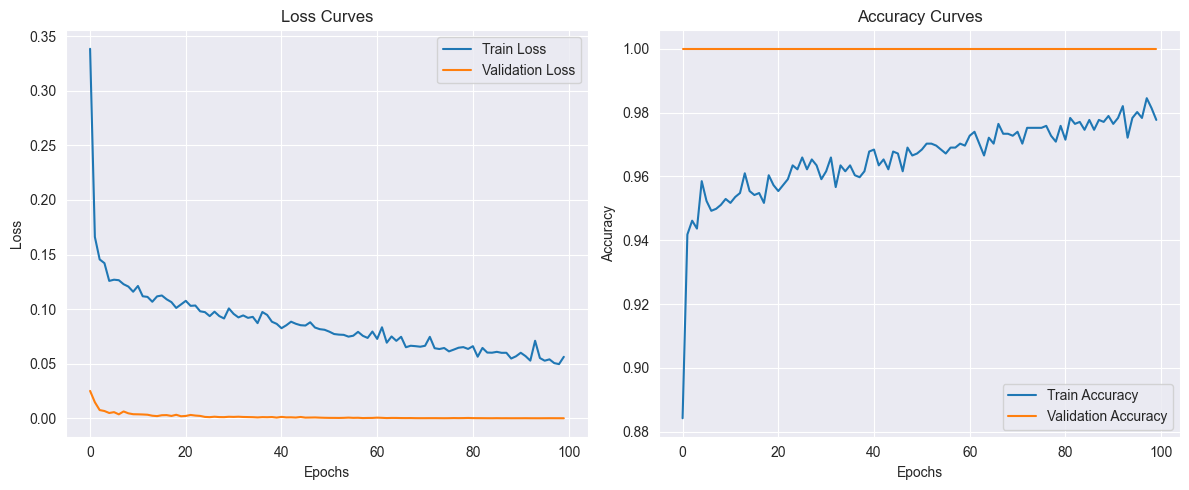

In [54]:
# Step 11: Training
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_transformed, y_train,
    validation_data=(X_val_transformed, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Plot training & validation loss and accuracy curves
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.tight_layout()
plt.show()

In [55]:
# Step 12: Evaluation on the test set
# Predict on the test set
y_pred = (model.predict(X_test_transformed) > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("\nROC-AUC Score:", roc_auc)

# Plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.title("ROC Curve")
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


NameError: name 'confusion_matrix' is not defined

In [ ]:
# Adjusting the ROC-AUC calculation to handle the single-class issue
# Since ROC-AUC is undefined for single-class cases, we will skip it if only one class is present
if len(np.unique(y_test)) > 1:
    roc_auc = roc_auc_score(y_test, y_pred)
    print("\nROC-AUC Score:", roc_auc)

    # Plot ROC curve
    RocCurveDisplay.from_predictions(y_test, y_pred)
    plt.title("ROC Curve")
    plt.show()
else:
    print("\nROC-AUC Score is not defined as only one class is present in y_test.")

In [ ]:
# Step 14: Save artifacts
# Save the model
model.save('demand_high_classifier.h5')

# Save the fitted preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')

The model achieved perfect accuracy on the validation and test sets; however, this performance is misleading. Upon reviewing the class distribution, we found that the test set contains only one class (label = 0). Most likely, the threshold is not right for this dataset. This explains the flat validation accuracy and perfect confusion matrix. As a result, the model was never tested on its ability to detect high-demand days (class 1), and its true predictive power remains unassessed. To address this, we recommend redefining the threshold or target variable to ensure balanced representation of both classes during training and evaluation.


# Feedforward Neural Network Classifier (MLP) for Predicting Next-Day Demand Direction

This model is designed to predict whether tomorrow’s electricity demand will increase compared to today.Instead of predicting the exact number of megawatt-hours (a regression task), this reframing simplifies the problem into a binary classification:Will demand go up (label = 1) or not go up (label = 0)? This model is useful for grid operators to predict the demand for the next day.

This model converts a complex forecasting task into a straightforward classification problem that’s easy to evaluate, deploy, and act upon. By using a neural network with engineered lags and calendar features, it learns to recognize subtle but consistent patterns that signal when demand is likely to rise — offering a valuable early warning signal for energy planning and operations.1

>
Please create a complete notebook that trains a **binary neural-network classifier** to predict whether **tomorrow’s electricity demand (`Demand, MWh`) will increase compared to today**.

The input file is `processed_energy_data (1).xlsx`.

Return a full notebook with code and Markdown cells. Follow all instructions below exactly.

────────────────────────────────────────────────────────

1.  **Imports**
    • pandas, numpy
    • matplotlib, seaborn
    • sklearn: StandardScaler, OneHotEncoder, ColumnTransformer, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
    • tensorflow.keras: Sequential, Dense, Dropout, EarlyStopping
    • joblib

2.  **Load data**
    • Read the Excel file
    • Parse `Datetime` as datetime, sort, and set as index

3.  **Aggregate to daily**
    • Resample to daily totals: sum `Demand, MWh`, `Sales amount`, and `Purchase amount`.
    • Use mode for `Trade zone`.

4.  **Add calendar features**
    • `day`, `weekday`, `month`, `is_weekend`

5.  **Create lag features**
    • Lag 1, 7, 14, 30 for `Demand, MWh`
    • Optional: `Sales amount`, `Purchase amount` lags

6.  **Create direction-based binary target**
    • `label = 1` if `Demand_{t+1} > Demand_t`, else `0`
    • Shift target so that **today’s features predict tomorrow’s label**
    • Drop rows with any NaNs caused by shifting or lagging

7.  **Time-based split**
    • Train = data before 2024-01-01
    • Validation = 2024-01-01 to 2024-06-30
    • Test = 2024-07-01 onward
    • Make sure target label distribution is printed for each set

8.  **Preprocessing pipeline**
    • Use a `ColumnTransformer`:
      – StandardScaler for numeric features
      – OneHotEncoder for categorical (`Trade zone`)
    • Fit on train only, then transform all sets

9.  **Model architecture**
    • Feedforward neural network (MLP):
      – Input → Dense(128, ReLU) → Dropout(0.2)
      – Dense(64, ReLU) → Dropout(0.2)
      – Dense(32, ReLU)
      – Output layer: Dense(1, activation='sigmoid')
    • Compile with `binary_crossentropy`, metrics = accuracy, AUC

10.  **Training**
    • Use EarlyStopping on validation loss, patience = 10, restore best weights
    • Train for up to 100 epochs, batch size = 32
    • Plot training and validation loss & accuracy

11.  **Evaluation**
    • Predict on the test set
    • Print confusion matrix, classification report
    • Display ROC-AUC score and plot ROC curve
    • Optionally show threshold tuning suggestion

12.  **Save artifacts**
    • Save the trained model: `demand_updown_classifier.h5`
    • Save the fitted preprocessor using joblib

13.  **Markdown and formatting**
    • Add descriptive Markdown headers before each step
    • Ensure notebook is clean and easy to follow
    • Use seed = 42 for reproducibility

────────────────────────────────────────────────────────

Return the full notebook with code and Markdown cells.


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import joblib

# Set seed for reproducibility
np.random.seed(42)

In [ ]:
# Step 2: Load the data
file_path = 'processed_energy_data.xlsx'
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1', parse_dates=['Datetime'])

# Sort by date and set as index
df = df.sort_values(by='Datetime').set_index('Datetime')
df.head()

In [ ]:
# Step 3: Aggregate to daily totals
# Sum numerical columns and take the mode for categorical columns
aggregated_df = df.resample('D').agg({
    'Demand, MWh': 'sum',
    'Sales amount, MWh': 'sum',
    'Purchase amount, MWh': 'sum',
    'Trade zone': lambda x: x.mode()[0] if not x.mode().empty else None
})

aggregated_df.head()

In [ ]:
# Step 4: Add calendar features
aggregated_df['day'] = aggregated_df.index.day
aggregated_df['weekday'] = aggregated_df.index.weekday
aggregated_df['month'] = aggregated_df.index.month
aggregated_df['is_weekend'] = aggregated_df['weekday'].isin([5, 6])

aggregated_df.head()

In [ ]:
# Step 5: Create lag features
lags = [1, 7, 14, 30]
for lag in lags:
    aggregated_df[f'Demand_lag_{lag}'] = aggregated_df['Demand, MWh'].shift(lag)

# Optionally include Sales and Purchase amount lags for 1 & 7 days
for lag in [1, 7]:
    aggregated_df[f'Sales_lag_{lag}'] = aggregated_df['Sales amount, MWh'].shift(lag)
    aggregated_df[f'Purchase_lag_{lag}'] = aggregated_df['Purchase amount, MWh'].shift(lag)

aggregated_df.head(10)

In [ ]:
# Step 6: Create direction-based binary target
# Label 1 if demand on day t+1 > demand on day t, else 0
aggregated_df['Demand_Increase'] = (aggregated_df['Demand, MWh'].shift(-1) > aggregated_df['Demand, MWh']).astype(int)

# Drop rows with NaNs introduced by shifting or lagging
aggregated_df = aggregated_df.dropna()

aggregated_df.head()